In [9]:
#importa SpaCy y carga el modelo en inglés
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
#importammos git
import git

#cargamos el modelo en inglés
nlp = spacy.load("en_core_web_sm")

#Clonar el corpus desde GitHub con el siguiente link https://github.com/COST-ELTeC/ELTeC-eng.git





[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python -m pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Cloning into 'ELTeC-eng'...
remote: Enumerating objects: 2942, done.
remote: Counting objects: 100% (769/769), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 2942 (delta 582), reused 659 (delta 472), pack-reused 2173
Receiving objects: 100% (2942/2942), 357.62 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (2326/2326), done.
Updating files: 100% (210/210), done.


In [ ]:
!git clone https://github.com/COST-ELTeC/ELTeC-eng.git

/home/codespace/.local/lib/python3.10/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


<AxesSubplot: >

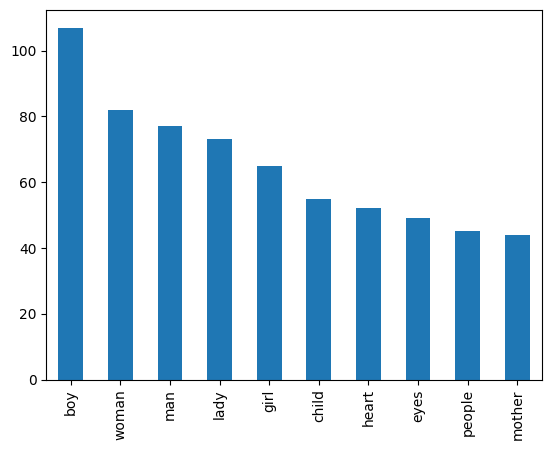

In [22]:
#abrir una única novela en la carpeta level1 de ELTeC-eng XML
with open('/workspaces/master-ua/Minería de textos/ELTeC-eng/level1/ENG18400_Trollope.xml', 'r') as file:
    text = file.read()
#procesar el XML y extraer los parrafos, se recomienda usar la librería BeautifulSoup
from bs4 import BeautifulSoup
soup = BeautifulSoup(text, 'html.parser')
parrafos = soup.find_all('p')


#Analizar el texto con el pipeline básico de SpaCy y extraer un CSV con “palabra | lema | categoria_gramatical | tipo de dependencia sintáctica | palabra de quien depende 
import csv
with open('analisis.csv', 'w') as file:
    writer = csv.writer(file)
    for parrafo in parrafos:
        doc = nlp(parrafo.text)
        for token in doc:
            writer.writerow([token.text, token.lemma_, token.pos_, token.dep_, token.head.text])

#Extraer los 10 grupos nominales más frecuentes (opcional: mostrar en un gráfico).
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from spacy import displacy
from spacy.matcher import Matcher
from spacy.tokens import Span
from spacy import displacy

#Cargamos el csv
df = pd.read_csv('analisis.csv', names=['palabra', 'lemma', 'categoria_gramatical', 'tipo_dependencia', 'palabra_depende'])
#Filtramos por categoría gramatical
df = df[df['categoria_gramatical'] == 'NOUN']
#Filtramos por tipo de dependencia
df = df[df['tipo_dependencia'] == 'nsubj']
#Contamos las palabras
df['palabra'].value_counts().head(10)

#muestra los resultados en un gráfico
df['palabra'].value_counts().head(10).plot(kind='bar')





<AxesSubplot: >

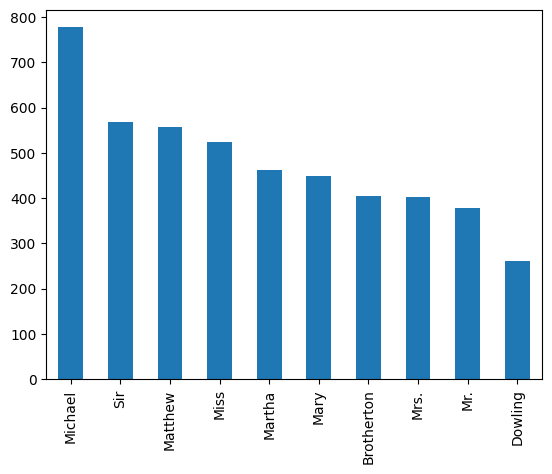

In [23]:
#Extraer las 10 entidades nombradas más frecuentes (opcional: mostrar en un gráfico).
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Cargamos el csv
df = pd.read_csv('analisis.csv', names=['palabra', 'lemma', 'categoria_gramatical', 'tipo_dependencia', 'palabra_depende'])
#Filtramos por categoría gramatical
df = df[df['categoria_gramatical'] == 'PROPN']
#Contamos las palabras
df['palabra'].value_counts().head(10)

#creamos un gráfico
df['palabra'].value_counts().head(10).plot(kind='bar')

Nombres:  32345
Adjetivos:  15057
Verbos:  28239
Adverbios:  13166


<BarContainer object of 4 artists>

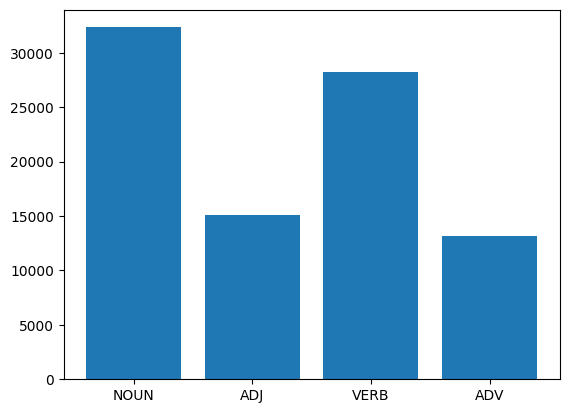

In [37]:
#Crear un gráfico donde se muestren la cantidad de nombres, adjetivos, verbos y adverbios.  (opcional: mostrar en un gráfico).
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Cargamos el csv
df = pd.read_csv('analisis.csv', names=['palabra', 'lemma', 'categoria_gramatical', 'tipo_dependencia', 'palabra_depende'])
#Filtramos por cada uan de las categorías gramaticales
df_noun = df[df['categoria_gramatical'] == 'NOUN']
df_adj = df[df['categoria_gramatical'] == 'ADJ']
df_verb = df[df['categoria_gramatical'] == 'VERB']
df_adv = df[df['categoria_gramatical'] == 'ADV']

#Contamos cuantos nombres, adjetivos, verbos y adverbios hay
print('Nombres: ', len(df_noun))
print('Adjetivos: ', len(df_adj))
print('Verbos: ', len(df_verb))
print('Adverbios: ', len(df_adv))


#creamos un gráficom con la cantidad de nombres, adjetivos, verbos y adverbios
plt.bar(['NOUN', 'ADJ', 'VERB', 'ADV'], [len(df_noun), len(df_adj), len(df_verb), len(df_adv)])



